<a href="https://colab.research.google.com/github/AntonAyzenberg/Persistent-homology-Examples/blob/master/My_Persistence_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --verbose git+https://github.com/mrzv/dionysus.git

In [0]:
import dionysus as d
import numpy as np

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D

In [4]:
simplices = [([1], 0), ([2], 0), ([3], 0), ([4], 0), ([2,3], 1), ([3,4], 2), ([1,2], 3), ([2,4], 3), 
             ([2,3,4], 4), ([1,3], 5), ([1,4], 6), ([1,2,3,4], 7), ([1,2,4], 7), ([1,2,3], 7), ([1,3,4], 7)]
f = d.Filtration()
for vertices, time in simplices: f.append(d.Simplex(vertices, time))
f.sort()
for s in f: print(s)

<1> 0
<2> 0
<3> 0
<4> 0
<2,3> 1
<3,4> 2
<1,2> 3
<2,4> 3
<2,3,4> 4
<1,3> 5
<1,4> 6
<1,2,3> 7
<1,2,4> 7
<1,3,4> 7
<1,2,3,4> 7


In [5]:
m = d.homology_persistence(f)
dgms = d.init_diagrams(m, f)
print(dgms) 
for i, dgm in enumerate(dgms):
  for pt in dgm:
    print(i, pt.birth, pt.death)

[Diagram with 4 points, Diagram with 3 points, Diagram with 0 points, Diagram with 0 points]
0 0.0 inf
0 0.0 3.0
0 0.0 1.0
0 0.0 2.0
1 3.0 4.0
1 5.0 7.0
1 6.0 7.0


/usr/local/lib/python3.6/dist-packages/dionysus/plot.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


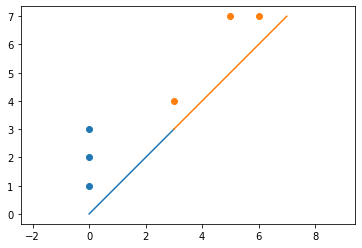

In [6]:
d.plot.plot_diagram(dgms[0], show = False)
d.plot.plot_diagram(dgms[1], show = True)

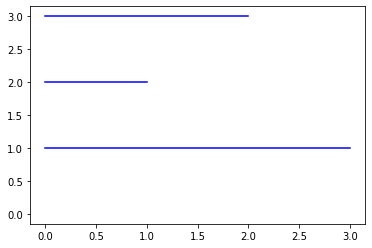

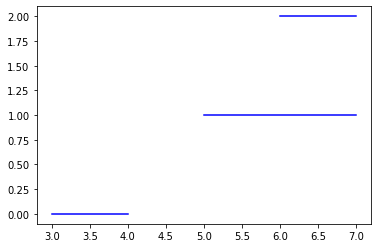

In [7]:
d.plot.plot_bars(dgms[0], show = True)
d.plot.plot_bars(dgms[1], show = True)

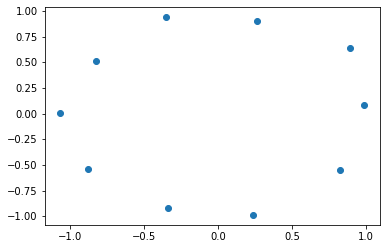

In [8]:
m=10
points=np.zeros((m,2))
for i in range(m) : points[i]=[np.cos(2*np.pi*i/m),np.sin(2*np.pi*i/m)]
points=points+np.random.uniform(-.1,.1, (m, 2))
plt.scatter(points[:,0],points[:,1])
plt.show()

/usr/local/lib/python3.6/dist-packages/dionysus/plot.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


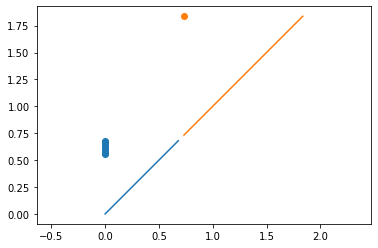

In [9]:
f = d.fill_rips(points, 3, 3)
m = d.homology_persistence(f)
dgms = d.init_diagrams(m, f)
d.plot.plot_diagram(dgms[0], show = False)
d.plot.plot_diagram(dgms[1], show = True)

In [0]:
def tor_emb(coords):
  phi=coords[0]
  psi=coords[1]
  x = (2+np.cos(psi))*np.cos(phi)
  y = (2+np.cos(psi))*np.sin(phi)
  z = np.sin(psi)
  return [x,y,z]

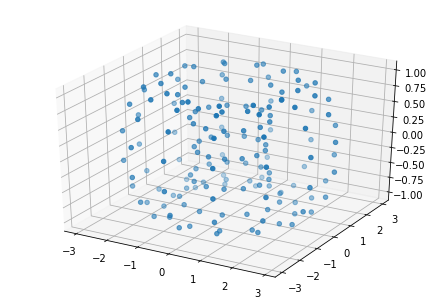

In [15]:
k=13
coords=np.arange(-np.pi, np.pi, 2*np.pi/k)
torus=np.zeros((k*k,3))
for i in range(k) : 
  for j in range(k) : 
    torus[i*k+j]=tor_emb([coords[i],coords[j]])
fig = plt.figure()
ax = Axes3D(fig)
xvals=torus[:,0]
yvals=torus[:,1]
zvals=torus[:,2]
ax.scatter(xvals, yvals, zvals)
plt.show()

/usr/local/lib/python3.6/dist-packages/dionysus/plot.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


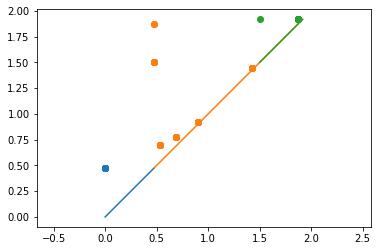

In [16]:
f = d.fill_rips(torus, 3, 7)
m = d.homology_persistence(f)
dgms = d.init_diagrams(m, f)
d.plot.plot_diagram(dgms[0], show = False)
d.plot.plot_diagram(dgms[1], show = False)
d.plot.plot_diagram(dgms[2], show = True)

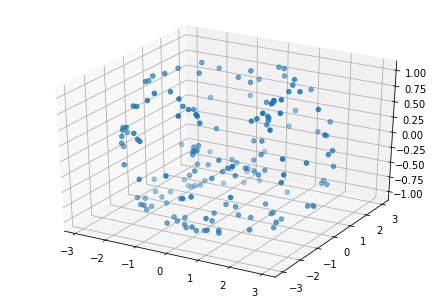

In [17]:
m=169
coords=np.random.uniform(-np.pi,np.pi, (m, 2))
torus=np.zeros((m,3))
for i in range(m) : torus[i]=tor_emb(coords[i])
fig = plt.figure()
ax = Axes3D(fig)
xvals=torus[:,0]
yvals=torus[:,1]
zvals=torus[:,2]
ax.scatter(xvals, yvals, zvals)
plt.show()

/usr/local/lib/python3.6/dist-packages/dionysus/plot.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


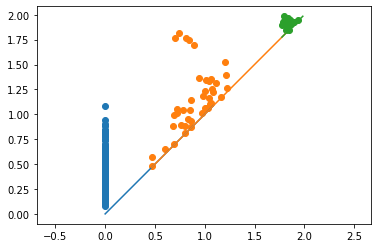

In [18]:
f = d.fill_rips(torus, 3, 7)
m = d.homology_persistence(f)
dgms = d.init_diagrams(m, f)
d.plot.plot_diagram(dgms[0], show = False)
d.plot.plot_diagram(dgms[1], show = False)
d.plot.plot_diagram(dgms[2], show = True)